In [1]:
!pip install fastai==1.0.52
from fastai.text import *

     |████████████████████████████████| 225kB 5.4MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=c1a402f76640b6b8fe97b17f44817b9d1d210346aa992205e021ac6ac74f3c0e
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
# aa=path/'Thesis Data'/'Our dataset'
# aa2=path/'Thesis Data'/'AA dataset'
char=path/'Thesis Data'/'char ulm'

In [4]:
import pandas as pd

a = pd.read_csv(news/'full_doc_train.csv')
b = pd.read_csv(news/'full_doc_test.csv')
df = pd.concat([a,b])
#df2 = pd.concat([a,b]) # don't run yet(RAM error)

In [ ]:
'''aa = pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_train.csv')
bb = pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_test.csv')
df1 = pd.concat([aa,bb])

def separate(str): # this method append in charachter wise
#   return str
  ret = ""
  for c in str:
    ret = ret+" "+c # add each charachter from word with space
  return ret

df1['text']=df1['text'].apply(separate) # separate charachter wise from word by applying 'separate' method
# df.to_csv(news/'news_3less.csv',index=False) # convert the data to csv format
df1.to_csv(char/'char-ulm.csv',index=False) # convert the data to csv format'''

In [ ]:
def separate(str): # this method append in charachter wise
#   return str
  ret = ""
  for c in str:
    ret = ret+" "+c # add each charachter from word with space
  return ret

In [ ]:
# df2['text']=df2['text'].apply(separate) # separate charachter wise from word by applying 'separate' method, don't run for RAM purpose

In [ ]:
# df2.head()

,label,text,is_valid
0,opinion,উ চ ্ চ ম া ধ ্ য ম ি ক প র ী ক ্ ষ া র ...,False
1,opinion,জ া ত ি স ং ঘ ে র স হ ক া র ী ম হ া স চ ি...,False
2,opinion,এ ক ট া ম ে য় ে চ ি ঠ ি ল ি খ ে ছ ে ত...,False
3,opinion,গ ত ব ছ র ে র ন ভ ে ম ্ ব র ে র শ ে ষ ।...,False
4,opinion,ঢ া ক া ৴ আ গ ઍ ট ১ ৫ ( ি ব ি ড ি ন উ জ...,False


In [ ]:
# df2.to_csv(news/'char_news.csv',index=False) # to_csv function exports the dataframe to csv format, don't need to indexing,convert the full_doc.csv to char_news.csv file

In [ ]:
# print(len(df2))
# df2 = df2[df2['label']!='politics'] # remove which label of text's is 'politics'
# print(len(df2))

76718
60687


In [ ]:
# df2.to_csv(news/'char_news_!politics.csv',index=False) # convert the file and save it this format,save on a directory which is define by 'news'

In [ ]:
# df2=pd.read_csv(news/'char_news_!politics.csv') # read a csv values file into dataframe,this csv file don't has 'politics' label
# print(len(df2))
# df2 = df2[df2['label']!='education'] # remove text label 'education'
# df2 = df2[df2['label']!='sports'] # remove text label 'sports'
# print(len(df2))
# df2.to_csv(news/'char_news_3less.csv',index=False) # export this csv file into a csv format by using 'to_csv',here remove 3 labels(most freuquent) of text which is 'education','sports' and 'politics' 

60687
41391


In [ ]:
# df2['label'].unique() # pandas unique function on a variable of interest to get unique values of the column

array(['opinion', 'international', 'economics', 'art', 'science_tech', 'crime', 'accident', 'environment',
       'entertainment'], dtype=object)

In [5]:
# we have to works with word level,if we works with charchter level then it exits the RAM limit
# here remove 'politics','education','sports' labels of text which is frequently occur in dataset and set it to news_3less.csv file
df = df[df['label']!='politics'] # remove the label which is 'politics'
df = df[df['label']!='education'] # remove the label which is 'education'
df = df[df['label']!='sports'] # remove the label which is 'sports'
print(len(df))
df.to_csv(news/'news_3less.csv',index=False) # convert the data to csv format

51690


In [6]:
df.head()

,label,text,is_valid
0,opinion,উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বি...,False
1,opinion,জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তা...,False
2,opinion,একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখ...,False
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি ...,False
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘান...,False


In [7]:
# bs=32
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

In [8]:
class NewTokenizer(BaseTokenizer): # apply tokenizer where inheirts from 'BaseTokenizer'
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

In [9]:
# 'xxunk',
#  'xxpad',
#  'xxbos',
#  'xxeos',
#  'xxfld',
#  'xxmaj',
#  'xxup',
#  'xxrep',
#  'xxwrep'

In [10]:
UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP

('xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep')

In [11]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [12]:
len(itos)

188

In [13]:
vocab=Vocab(itos) # create a instance of Vocabulary class and pass itos as a parameter
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[]) # create a instance of Tokenizer class and pass the parameter NewTokenizer,pre_rules an post_rules

On half dataset


In [14]:
# use TextLMDataBunch to create a language model specific data bunch
data_lm = TextLMDataBunch.from_csv(news , 'news_3less.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab) # read 'news_3less' csv file as a Databunch
data_lm.save('news_char_3less.pkl')


In [15]:
data_lm = load_data(news, 'news_char_3less.pkl', bs=bs)

In [16]:
data_lm.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:337: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,় প ে ট ্ র ল ব ো ম া হ া ম ল া য ় দ গ ্ ধ হ ও য ় া র এ ক দ ি ন প র গ ত ব ৃ হ স ্ প ত ি ব া র র া
1,শ ি প ন ি র ্ ম া ণ ক র া হ ব ে xxunk “ ব ি দ ্ য ু ৎ ক ে ন ্ দ ্ র ট ি আ ল ্ ট ্ র া - স ু প া র ক ্ র ি ট ি ক ্ য
2,ক র ল ে ই ত া দ ে র ক া র ্ য া ল য ় প ু ল ি শ দ ি য ় ে অ ব র ু দ ্ ধ ক র া স ম ্ প ূ র ্ ণ অ গ ণ ত া
3,ি স ে ম ্ ব র জ া ত ি স xxunk ঘ ে র গ ব ে ষ ক দ ল ব া xxunk ল া দ ে শ ে আ স ে xxunk ত া র া গ ত ২ ২ থ ে ক ে ২ ৭
4,"স ম য় ে র থ ি ব ি র জ ন গ ণ য ে দ ি ন র া ত য া প ন ক র ে ছ ে ন , ত া র থ ে ক ে ব া xxunk ল া দ ে শ ক ত"


In [17]:
''.join(data_lm.train_dl.vocab.itos) # join dala_lm, train_dl with vocab and itos

'xxunkxxpadxxbosxxeosxxfldxxrepxxwrep !"#$%&\'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”\u202a™−√∝∞'

In [18]:
data_lm.train_dl.vocab.itos[:10] # print first 10 items

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep', ' ', '!', '"']

In [19]:
len(data_lm.train_dl.vocab.itos)

188

In [20]:
# the most important functions of this module are language_model_learner and text_classifier_learner,they will help you define a learner using a pretrained model
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5) # this is the first stage of training,where we use the pretrained language model weights,first param is our language model data,right now here don't use pretrained,drop mult is set the amount of dropout


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


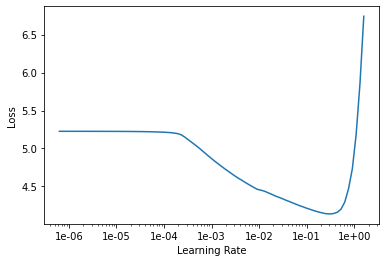

In [21]:
learn.lr_find() # this method to serach through a range of learning rates to find the optimum one for our dataset,learning rate finder will increase the learning rate after each mini batch
learn.recorder.plot() 

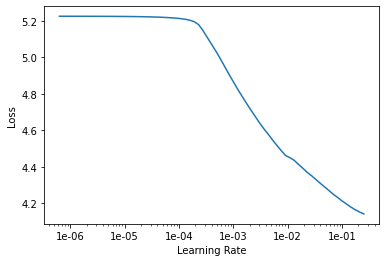

In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
# running
learn.fit_one_cycle(1, 1e-2) # training the dataset on just one epoch,and 2nd parameter is low learning rate on initial layers and later gradually increase the laerning rates
learn.save('news_char_3less_1');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [24]:
learn.save('news_char_3less_1');

In [ ]:
# nwo
learn.load('news_char_3less_1');
learn.fit_one_cycle(1, 1e-2) # after each training we have save to save it on a file
learn.save('news_char_3less_2');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.422709,1.370326,0.599538,54:09


In [ ]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_3'); # if you access this file after long time you have to load this file first

epoch,train_loss,valid_loss,accuracy,time
0,1.329861,1.253091,0.630889,52:11


In [ ]:
#learn.load('news_char_3less_3');
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_4');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,7.252499,4.624757,0.114596,1:04:04


In [ ]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_5'); # don't need to use this file,you use 'news_char_3less_4' file

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.020308,53:21


Training on the rest of the data


In [ ]:

a = pd.read_csv(news/'full_doc_train.csv')
b = pd.read_csv(news/'full_doc_test.csv')
df3 = pd.concat([a,b])
len(df3['label'].unique()) # length of the unique label of the dataset

12

In [ ]:
print(len(df3))
df3 = df3[(df3['label']=='politics') | (df3['label']=='sports') | (df3['label']=='education')] # previously we erase these 3 labels of text,now we take these 3 labels of text
print(len(df3))

95855
44165


In [ ]:
df3.to_csv(news/'news_3.csv',index=False) # export the datafrme (labels are 'politics','sports','education') into a csv file 

In [ ]:
df3 = pd.read_csv(news/'news_3.csv') # read the 'news_3' csv file using pandas 
len(df3['label'].unique()) # print the unique label(which is 'politics','sports','education')

3

In [ ]:
df3.head()

,label,text,is_valid
0,politics,আদালতে ‘অতি উৎসাহীদের’ রিট আবেদনের কারণে নারায়...,False
1,politics,চলমান হরতাল শুক্রবার সকাল ছয়টা পর্যন্ত বাড়ান...,False
2,politics,"ঢাকা, জুন ০৮ (বিডিনিউজ টোয়েন্টিফোর ডটকম)- রাজন...",False
3,politics,"ঢাকা, সেপ্টেম্বর ২৫ (বিডিনিউজ টুয়েন্টিফোর ডটকম...",False
4,politics,একাত্তরে গণহত্যার দায়ে দলের স্থায়ী কমিটির সদস্...,False


In [ ]:
data_lm = TextLMDataBunch.from_csv(news , 'news_3.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab) # applying data bunch where using batch size,tokenizer and voacabulary 
data_lm.save('news_char_3.pkl')

In [ ]:
data_lm=load_data(news,'news_char_3.pkl',bs=bs)

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5) # this is the first stage of training,where we use the pretrained language model weights,first param is our language model data,right now here don't use pretrained,drop_mult is set the amount of dropout

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


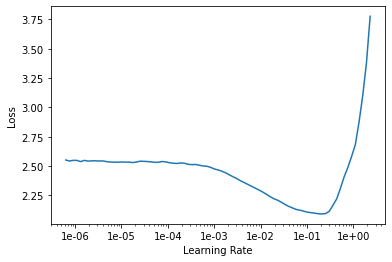

In [ ]:
learn.load('news_char_3less_3');
learn.lr_find() # find the learning rate then recorder the plot
learn.recorder.plot()

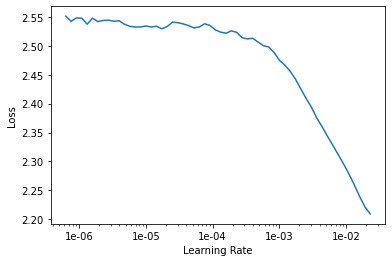

In [ ]:
learn.recorder.plot(skip_end=30)

In [ ]:
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_6');

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [ ]:
1e-2

0.01

In [ ]:
1e-7

1e-07

In [ ]:
1e-3

0.001